In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import numpy as np  
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter 
from sklearn.feature_selection import SelectKBest , chi2  
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  
import time

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mlxtend in c:\programdata\anaconda3\lib\site-packages (0.20.0)


In [3]:
# Dans cette partie , je vais tester plusieurs techniques de selection des variables à fin de minimiser la taille de dataset et d'illiminer 
# les caractéritiques non significatives. 
# On va travailler sur la techniques de normalisation déjà validée précédemment   

In [4]:
df = pd.read_csv('Base2.csv')
df1=df 
df   

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
#Understanding our data 
df.columns  

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
# Good No Null Values!
df.isnull().sum().max()  

0

In [7]:
df["class"].unique() 
df["class"].value_counts()
#Le data set est équilibré   

normal     77054
anomaly    71463
Name: class, dtype: int64

In [8]:
df.head()  

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


anormaly 48.12 % of the dataset
normal 51.88 % of the dataset


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n ( anormaly|| normaly)')

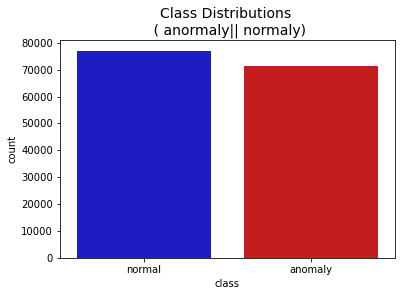

In [9]:
print('anormaly', round(df['class'].value_counts()['anomaly']/len(df) * 100,2), '% of the dataset')
print('normal', round(df['class'].value_counts()['normal']/len(df) * 100,2), '% of the dataset')
#the dataset  est plus au moins equilibré 
colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=df, palette=colors)
plt.title('Class Distributions \n ( anormaly|| normaly)', fontsize=14)  

In [10]:
#Encodage
le = preprocessing.LabelEncoder()
le.fit(['normal','anomaly'])
df['class']=le.fit_transform(df['class'])

In [11]:
df["protocol_type"].unique()  

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
df["flag"].unique() 

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [13]:
df["service"].unique() 

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [14]:
#Encodage
le = preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class']) 

In [15]:
# OneHotEncoding encoding of protocol_type , service and flag columns 
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder() 
ohe.fit_transform(df[['protocol_type','service','flag']]).toarray() 

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
#Encodage des  variable catégoriques protocol_type , service et flag 
feature_arr=ohe.fit_transform(df[['protocol_type','service','flag']]).toarray() 
ohe.categories_
feature_labels= ohe.categories_ 
feature_labels=['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
        'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
        'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
        'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
        'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
        'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH']




In [17]:
features=pd.DataFrame(feature_arr,columns=feature_labels)
df=pd.concat([df,features],axis=1)
df
 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148513,0,tcp,http,SF,317,938,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:

df.drop(['protocol_type','service','flag'], axis=1, inplace=True) 

In [19]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,0.101557,0.015722,0.000707,0.020806,0.248214,0.002599,0.000956,0.002007,0.604779,0.002316
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,0.302066,0.124399,0.026580,0.142734,0.431978,0.050915,0.030907,0.044749,0.488900,0.048072
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
Col=df.columns.tolist() 

# Before Feature selection 

In [21]:
X = df.drop('class', axis=1) 
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  

In [22]:
start = time.time()
pipe_log = make_pipeline(StandardScaler(),LogisticRegression())
pipe_log.fit(X_train, y_train)  # apply scaling on training data
pipe_log.score(X_test, y_test)  # apply scaling on testing data.'' 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_log.score(X_test, y_test) ) 

Temps d'exécution : 3.7ms 0.9581470509022354


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
start = time.time()
pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_kn.fit(X_train,y_train)  # apply scaling on training data
pipe_kn.score(X_test, y_test) 
end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_kn.score(X_test, y_test) ) 

Temps d'exécution : 1.2e+02ms 0.9921896040937247


In [24]:
start = time.time()
pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_dc.fit(X_train, y_train)  # apply scaling on training data
pipe_dc.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_dc.score(X_test, y_test) )

Temps d'exécution : 2.7ms 0.9943441960678696


In [25]:
start = time.time()
pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)  # apply scaling on training data
pipe_rf.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_rf.score(X_test, y_test) ) 

Temps d'exécution : 1.4e+01ms 0.9956638836520334


# filtering features by correlation 

Text(0.5, 1.0, 'La matrice de corrélation')

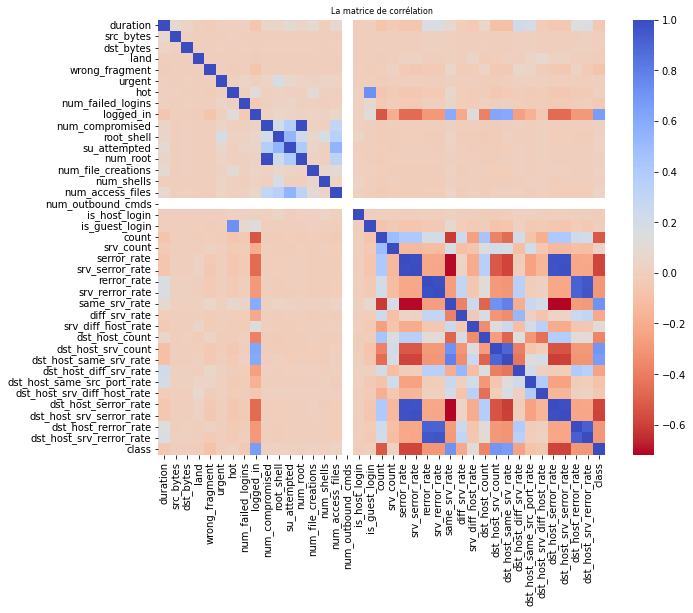

In [32]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))
# Entire DataFrame
corr = df1.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':8},ax=ax1)
ax1.set_title("La matrice de corrélation", fontsize=8) 

# NB : 
Many features in the dataset are higly correlated ( correlation higher than 0.8 or less than -0.8 . 
Those features need to be illminated from the dataset in order to improve the performance of the model and reducing its complexity . 

 

In [31]:
abs(df.corr()['class']) 

duration          0.052119
src_bytes         0.005457
dst_bytes         0.003583
land              0.008817
wrong_fragment    0.081696
                    ...   
S1                0.045455
S2                0.023252
S3                0.031804
SF                0.727673
SH                0.049472
Name: class, Length: 123, dtype: float64

# NB : 
Many features are not correlated to the class , they do not involove the model 


In [32]:
features= abs(df.corr()["class"][abs(df.corr()["class"])>0.7]).drop('class').index.tolist()
X = df[features]
X
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [35]:
X.shape 

(148517, 2)

In [36]:
X

,same_srv_rate,SF
0,1.00,1.0
1,0.08,1.0
2,0.05,0.0
3,1.00,1.0
4,1.00,1.0
...,...,...
148512,1.00,1.0
148513,1.00,1.0
148514,1.00,1.0
148515,1.00,1.0


In [33]:
start = time.time()
pipe_log = make_pipeline(StandardScaler(),LogisticRegression())
pipe_log.fit(X_train, y_train)  # apply scaling on training data
pipe_log.score(X_test, y_test)  # apply scaling on testing data.'' 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_log.score(X_test, y_test) )  

Temps d'exécution : 0.11ms 0.8555884729329383


In [34]:
start = time.time()
pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_kn.fit(X_train,y_train)  # apply scaling on training data
pipe_kn.score(X_test, y_test) 
end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_kn.score(X_test, y_test))  

Temps d'exécution : 1e+01ms 0.8615136008618368


In [37]:
start = time.time()
pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_dc.fit(X_train, y_train)  # apply scaling on training data
pipe_dc.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_dc.score(X_test, y_test) ) 

Temps d'exécution : 0.037ms 0.8645569620253165


In [38]:
start = time.time()
pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)  # apply scaling on training data
pipe_rf.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_rf.score(X_test, y_test) )  

Temps d'exécution : 1.9ms 0.8643684352275788


# NB 
Comme la valeur de corrélation 0.7 est choisi aléatoirement , essayons maintenant de tester plusieur valeur possible , pour qu'on puisse choisir la mielleur valeur seuil . 

In [41]:
vals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
for val in  vals : 
    
   features= abs(df.corr()["class"][abs(df.corr()["class"])>val]).drop('class').index.tolist()
   X=df[features]
   y=df['class']
   X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
   start = time.time()
   pipe_log = make_pipeline(StandardScaler(),LogisticRegression())
   pipe_log.fit(X_train, y_train)  # apply scaling on training data
   pipe_log.score(X_test, y_test)  # apply scaling on testing data.'' 
   end = time.time()
   elapsed = end - start
   print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_log.score(X_test, y_test),len(X.columns)) 
   



Temps d'exécution : 0.85ms 0.9356046323727444 30
Temps d'exécution : 0.7ms 0.9260705628871533 23
Temps d'exécution : 0.56ms 0.9082951791004579 16
Temps d'exécution : 0.33ms 0.9083221115001346 13
Temps d'exécution : 0.28ms 0.898437920818745 12
Temps d'exécution : 0.095ms 0.8678696471855643 5
Temps d'exécution : 0.096ms 0.8555884729329383 2


# NB : 
C'est vrai que nous avons gagné en terme de temps d'exécusion mais en contre partie la perfermance du modèle à diminuer . 
la meilleur valeur à choisir dans ce cas est pour Temps d'exécution : 0.7ms 0.9260705628871533 23 => valeur de corrélation supérieur à 0.2 

In [44]:
vals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

for val in  vals : 
   features= abs(df.corr()["class"][abs(df.corr()["class"])>val]).drop('class').index.tolist()
   X=df[features]
   y=df['class']
   X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  
   start = time.time()
   pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier())
   pipe_kn.fit(X_train,y_train)  # apply scaling on training data
   pipe_kn.score(X_test, y_test) 
   end = time.time()
   elapsed = end - start
   print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_kn.score(X_test, y_test),len(X.columns))  

Temps d'exécution : 8.9e+01ms 0.9849178561809857 30


KeyboardInterrupt: 

# NB : 
Ce teste nécessite un temps d exécusion non supportable par ma machine 

In [45]:
vals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

for val in  vals : 
   features= abs(df.corr()["class"][abs(df.corr()["class"])>val]).drop('class').index.tolist()
   X=df[features]
   y=df['class']
   X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
   start = time.time()
   pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
   pipe_dc.fit(X_train, y_train)  # apply scaling on training data
   pipe_dc.score(X_test, y_test) 
   end = time.time()
   elapsed = end - start
   print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_dc.score(X_test, y_test),len(X.columns))

Temps d'exécution : 0.39ms 0.9857796929706437 30
Temps d'exécution : 0.31ms 0.9833288446000539 23
Temps d'exécution : 0.24ms 0.9723673579315917 16
Temps d'exécution : 0.2ms 0.9516294101804471 13
Temps d'exécution : 0.18ms 0.9480204686237543 12
Temps d'exécution : 0.092ms 0.916401831403178 5
Temps d'exécution : 0.028ms 0.8645569620253165 2


# NB : 
De mème pour l'algorithme DecisionTreeClassifier pour toutes les valeurs de corrélation , la perfermance du modèle a diminué . 
C'est vrai que nous avons gagné en terme de temps d exécusion mais la perte de la perfermance prouve que la selection par corrélation n'est un bon choix dans ce cas . 
Temps d'exécution : 0.39ms 0.9857796929706437 30 => la meilleur valeur de corrélation doit ètre suppérieur 0.1

In [48]:
vals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

for val in  vals : 
   features= abs(df.corr()["class"][abs(df.corr()["class"])>val]).drop('class').index.tolist()
   X=df[features]
   y=df['class']
   X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
   start = time.time()
   pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
   pipe_rf.fit(X_train, y_train)  # apply scaling on training data
   pipe_rf.score(X_test, y_test) 
   end = time.time()
   elapsed = end - start
   print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_rf.score(X_test, y_test),len(X.columns) )   

Temps d'exécution : 5.8ms 0.9888499865338002 30
Temps d'exécution : 5.3ms 0.9865338001615944 23
Temps d'exécution : 5.1ms 0.9757877726905467 16
Temps d'exécution : 4.5ms 0.9583086453002962 13
Temps d'exécution : 4.8ms 0.953784002154592 12
Temps d'exécution : 3.6ms 0.9196606517640722 5
Temps d'exécution : 1.7ms 0.8645569620253165 2


# NB : 
De mème pour l'algorithme RandomForestClassifier pour toutes les valeurs de corrélation , la perfermance du modèle a diminué . C'est vrai que nous avons gagné en terme de temps d exécusion mais la perte de la perfermance prouve que la selection par corrélation n'est un bon choix dans ce cas . Temps d'exécution : 5.8ms 0.9857796929706437 30 => la meilleur valeur de corrélation doit ètre suppérieur 0.1 

# Filtering with dependency classifiers : chi2 , anova .. (selection based on dependency )

In [72]:
X = df.drop('class', axis=1) 
y=df['class'] 
chi2(X,y) 

(array([8.82547353e+06, 3.21768902e+09, 1.53049748e+09, 1.15419458e+01,
        2.78361288e+03, 4.13461886e+00, 2.95152313e+02, 3.27439597e+02,
        3.91195305e+04, 2.82071022e+04, 2.68983969e+01, 1.26879611e+02,
        3.48156229e+04, 1.02016105e+03, 1.45250692e-02, 4.22689151e+02,
                   nan, 9.11616930e+00, 2.16162560e+00, 6.67378787e+06,
        6.72397376e+03, 3.73443485e+04, 3.74564453e+04, 1.12102469e+04,
        1.12093900e+04, 2.11352619e+04, 3.86794516e+03, 1.30859221e+03,
        1.09328421e+06, 7.37801760e+06, 2.48626384e+04, 3.98205170e+03,
        6.43426485e+02, 1.62473749e+02, 3.70541494e+04, 3.84647128e+04,
        1.02719583e+04, 1.08681195e+04, 5.08041997e+03, 8.76264901e+01,
        5.84902148e+03, 1.70389029e+02, 2.92367935e+01, 9.77960315e+02,
        2.15647258e+00, 2.96919146e+02, 8.15146635e+02, 8.34554889e+02,
        6.24298812e+02, 6.51254719e+02, 5.91951723e+02, 6.08125268e+02,
        5.19889892e+02, 9.17362130e+03, 5.07849293e+02, 3.279458

In [73]:
selector=SelectKBest(chi2,k=10)
X1=selector.fit_transform(X,y)
F1=np.append(selector.get_feature_names_out(),"class")
df=df[F1]

In [74]:
df 

,duration,src_bytes,dst_bytes,logged_in,count,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_srv_serror_rate,S0,class
0,0,491,0,0,2,0.0,150,25,0.00,0.0,1
1,0,146,0,0,13,0.0,255,1,0.00,0.0,1
2,0,0,0,0,123,1.0,255,26,1.00,1.0,0
3,0,232,8153,1,5,0.2,30,255,0.01,0.0,1
4,0,199,420,1,30,0.0,255,255,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,1,1,0.0,100,141,0.00,0.0,1
148513,0,317,938,1,2,0.0,197,255,0.00,0.0,1
148514,0,54540,8314,1,5,0.0,255,255,0.00,0.0,0
148515,0,42,42,0,4,0.0,255,252,0.00,0.0,1


# NB : 
le nombre des caractéristiques est diminué à 11 . 

In [76]:
# training models and comparing scores . 
X = df.drop('class', axis=1) 
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)   

In [77]:
start = time.time()
pipe_log = make_pipeline(StandardScaler(),LogisticRegression())
pipe_log.fit(X_train, y_train)  # apply scaling on training data
pipe_log.score(X_test, y_test)  # apply scaling on testing data.'' 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_log.score(X_test, y_test) ) 

Temps d'exécution : 0.3ms 0.8748451387018583


Nous avons gagné en terme de temps d'exécusion mais on remarque une chute des perfermances 

In [78]:
start = time.time()
pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_kn.fit(X_train,y_train)  # apply scaling on training data
pipe_kn.score(X_test, y_test) 
end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_kn.score(X_test, y_test) )  

Temps d'exécution : 6.9ms 0.950363587395637


 Nous avons gagné en terme de temps d'exécusion mais on remarque une chute de la  perfermance du modèle  

In [79]:
start = time.time()
pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_dc.fit(X_train, y_train)  # apply scaling on training data
pipe_dc.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_dc.score(X_test, y_test) ) 

Temps d'exécution : 0.25ms 0.9905736601131161


 Nous avons gagné en terme de temps d exécusion mais on remarque une perte minime de la perfermance du modèle 

In [80]:
start = time.time()
pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)  # apply scaling on training data
pipe_rf.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_rf.score(X_test, y_test) )  

Temps d'exécution : 5.0ms 0.9926205224885537


Nous avons gagné en terme de temps d exécusion mais on remarque une perte minime de la perfermance 

# NB : 
Cette méthode de selection a montré des mauvaises perfermances losque nous avons appliqué au KNN et au Logistic regression 
mais elle est acceptable pour RF et DT 

# Wrapper Method 

In [ ]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
#forward feature selection 
sfs= SFS(pipe, k_features=5,forward=True , floating=False , verbose=2,scoring='accuracy', cv=4 , n_jobs=-1).fit(X_train,y_train) 

In [127]:

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
#forward feature selection 
sfs= SFS(pipe, k_features=5,forward=True , floating=False , verbose=2,scoring='accuracy', cv=4 , n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:   19.9s finished

[2022-05-28 01:00:58] Features: 1/5 -- score: 0.8595976283468758[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:   21.5s finished

[2022-05-28 01:01:20] Features: 2/5 -- score: 0.9037140660728796[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.4s finished

[2022-05-28 01:01:43] Features: 3/5 -- score: 0.9117491193200584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 119 out 

In [ ]:
Cette méthode nous a permis 

In [128]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#forward feature selection 
sfs= SFS(pipe, k_features=5,forward=True , floating=False , verbose=2,scoring='accuracy', cv=4 , n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:    6.2s finished

[2022-05-28 01:03:43] Features: 1/5 -- score: 0.9541149299513808[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:   11.0s finished

[2022-05-28 01:03:54] Features: 2/5 -- score: 0.9792884206249042[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   17.0s finished

[2022-05-28 01:04:11] Features: 3/5 -- score: 0.9884726205411822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 119 out 

In [129]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
#forward feature selection 
sfs= SFS(pipe, k_features=5,forward=True , floating=False , verbose=2,scoring='accuracy', cv=4 , n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   55.3s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

#Temps d'exécusion enorme . .. 
Nous avons mis en evidence que cette méthode est perfermante en terme de selection .. la perfermance augmente à chaque étape . 
mais elle est  couteuse en terme de temps d'éxécusion . . 

# Feature selection by variance 

In [172]:
X = df.drop('class', axis=1) 
y = df['class'] 
# Some Features has very low variance 
# we can apply VarianceThreshold selector (not really recommended less complex than Wapped method)  
from sklearn.feature_selection import VarianceThreshold 
selector= VarianceThreshold(threshold=0.25)
selector.fit_transform(X).shape  

(148517, 11)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)    

In [174]:
end = time.time()
pipe_log = make_pipeline(StandardScaler(),LogisticRegression())
pipe_log.fit(X_train, y_train)  # apply scaling on training data
pipe_log.score(X_test, y_test)  # apply scaling on testing data.'' 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_log.score(X_test, y_test) )  

Temps d'exécution : 4.1e+01ms 0.9581470509022354


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
start = time.time()
pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_kn.fit(X_train,y_train)  # apply scaling on training data
pipe_kn.score(X_test, y_test) 
end = time.time()
elapsed = end - start

print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_kn.score(X_test, y_test) )  

Temps d'exécution : 9.5e+01ms 0.9921896040937247


In [176]:
start = time.time()
pipe_dc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_dc.fit(X_train, y_train)  # apply scaling on training data
pipe_dc.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_dc.score(X_test, y_test) ) 

Temps d'exécution : 1.8ms 0.9946673848639914


In [178]:
start = time.time()
pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)  # apply scaling on training data
pipe_rf.score(X_test, y_test) 
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms',pipe_rf.score(X_test, y_test) )  

Temps d'exécution : 9.6ms 0.9958254780500942


Nous n'avons pas perdu en termes de calcul pour le randomForest Classifier ni en performance puisque nous sommes arrivés à sélectionner seulement 11 caractéristiques . Dans ce cas, nous allons adapter cette méthode pour la sélection des variable .  